In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random

## Dictionary for mapping the american state names to Two-Letter codes. So the temperature data can be merged with the wildfire data.

In [2]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
}

In [3]:
# import sqlite3

# # # Read sqlite query results into a pandas DataFrame
# file = '/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/FPA_FOD_20170508.sqlite'
# con = sqlite3.connect(file)
# df = pd.read_sql_query("SELECT * FROM fires", con)
# con.close()
# Verify that result of SQL query is stored in the dataframe
# Write dataframe obtained from sql query to a csv file
# df.to_csv('/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/wildfires.csv')


#### Weather data
## Average monthly temperature data per state in US 
# import requests

# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-tavg.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('./data/temp/tempavg.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()

## Palmer Z-Index for capturing monthly short term drought
## Information for Palmer Z-Index https://www.ncdc.noaa.gov/temp-and-precip/drought/historical-palmers/overview
# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-zndx.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('./data/temp/PZI.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()

## Palmer PDSI-Index for capturing drought
# Information for Palmer DS-Index https://www.ncdc.noaa.gov/temp-and-precip/drought/historical-palmers/overview
# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-pdsi.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('./data/temp/PDSI.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()


## Palmer PDSI-Index for capturing drought
## Information for Palmer HDI-Index https://www.ncdc.noaa.gov/temp-and-precip/drought/historical-palmers/overview
# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-phdi.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('./data/temp/PHDI.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()

# Import wildfire data which is download from kaggle

In [5]:
dfWild = pd.read_csv('/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/wildfires.csv',\
                     parse_dates=True)
display(dfWild.columns.values)
dfWild['DATE_DISCOVERY'] = pd.to_datetime(dfWild['FIRE_YEAR'] * 1000 + dfWild['DISCOVERY_DOY'], format='%Y%j')
dfWild = dfWild[['DATE_DISCOVERY','STAT_CAUSE_DESCR','FIRE_SIZE','FIRE_SIZE_CLASS','STATE','LATITUDE','LONGITUDE']]
dfWild = dfWild.sort_values(by=['STATE','DATE_DISCOVERY'])

/Users/max/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID',
       'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME', 'Shape'], dtype=object)

In [6]:
display(dfWild)

,DATE_DISCOVERY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,LATITUDE,LONGITUDE
1361966,1992-04-04,Smoking,0.10,A,AK,64.833335,-147.516662
1361967,1992-04-06,Miscellaneous,0.10,A,AK,61.666667,-149.433334
1361968,1992-04-07,Smoking,0.10,A,AK,61.566665,-149.350006
1361945,1992-04-20,Debris Burning,0.30,B,AK,61.566665,-149.083328
210328,1992-04-21,Structure,0.10,A,AK,64.349600,-147.369000
...,...,...,...,...,...,...,...
1808353,2015-12-04,Fireworks,0.25,A,WY,42.815900,-106.281000
1829530,2015-12-05,Debris Burning,1.00,B,WY,42.821600,-106.378900
1792586,2015-12-08,Miscellaneous,40.00,C,WY,42.206111,-105.264167
1817808,2015-12-12,Campfire,0.10,A,WY,42.773100,-106.354700


Import csv data containing the temperatures, Palmer Z-Index, Palmer DS-Index. Change states to Two-letter code and change temperature from Fahrenheit to Celsius

In [7]:
# Import csv data which is obtained from the NOAA site
import re
from datetime import datetime

# Function for changing location to Two-letter code of State,
# using regex and dictionary which maps from state to Two-letter code
def extractState(text):
    pattern = r'(.+)\sCD'
    regex = re.compile(pattern, flags=re.IGNORECASE)
    state = regex.match(text).groups()[0]
    TwoLetterState = us_state_abbrev[state]
    return TwoLetterState

def importNOAA(file, MeasuredValue, skiprow):
    
    dateparse = lambda x: datetime.strptime(x, '%Y%m')
    df =  pd.read_csv(file, error_bad_lines=False,skiprows=range(skiprow),\
                     parse_dates=['Date'], date_parser=dateparse)
    
    df  = df.rename(columns={'Value':MeasuredValue})
    
    if MeasuredValue.upper() == 'TEMP':
        df[MeasuredValue] = df[MeasuredValue].apply(lambda x: (x-32)*5/9)
        
    # Change location to Two-letter code of State, drop columns and make column names uppercase
    df['State'] = df.Location.apply(extractState)
    df = df[(df.Date > '1991-01-01') & (df.Date < '2016-01-01')]
    df = df.drop(columns=['Location','Anomaly (1901-2000 base period)','1901-2000 Mean','Rank'])
    df.columns = map(str.upper, df.columns)
    
    # Group df by state and date and take average of measured value 
    # because every station has multiple weather stations
    df = pd.DataFrame(df.groupby(['STATE','DATE'], as_index=False)[MeasuredValue].mean())
    return df

dftemp = importNOAA('./data/temp/tempavg.csv','TEMP',3)
dfPalmerZ = importNOAA('./data/temp/PZI.csv','PALMZ',2)
dfPalmerDS = importNOAA('./data/temp/PDSI.csv','PALMDS',2)
dfPalmerDH = importNOAA('./data/temp/PHDI.csv','PALMDH',2)

In [8]:
display(dftemp)

,STATE,DATE,TEMP
0,AL,1991-02-01,9.979167
1,AL,1991-03-01,13.583333
2,AL,1991-04-01,18.569444
3,AL,1991-05-01,22.750000
4,AL,1991-06-01,24.791667
...,...,...,...
14347,WY,2015-08-01,17.744444
14348,WY,2015-09-01,15.011111
14349,WY,2015-10-01,9.000000
14350,WY,2015-11-01,-1.794444


# Create rolling window mean for current and previous x months average temperature/Palmer Z-Index/Palmer DS-Index

In [9]:
# Groupby state and date, and add a movingaverage for 2 months until the end month
def addMovingAverage(df, colname, endMonth):
    months = range(2, endMonth+1)
    for i in months:
        month = i
        df.loc[:, f'{month}Mavg{colname}'] = df[f'{colname}'].rolling(month).mean()
    return df

# Make lag for specific column
def addShiftCol(df, colname, shift):
    for i in shift:
        df.loc[:, f'{colname}ShiftMIN{i}'] = df[f'{colname}'].shift(periods=i)
    return df

dftemp = addMovingAverage(dftemp, 'TEMP', 12)
dftemp = addShiftCol(dftemp, 'TEMP', [1,2,3,4])
dfPalmerZ = addMovingAverage(dfPalmerZ, 'PALMZ', 12)
dfPalmerDS = addMovingAverage(dfPalmerDS, 'PALMDS', 12)
dfPalmerDH = addMovingAverage(dfPalmerDH, 'PALMDH', 12)

# Merge the wildfires with the indices using state, month and year

In [10]:
def addMonthYear(df):
    col = df.columns[df.dtypes == 'datetime64[ns]'][0]
    df.loc[:, 'YEAR'] = df[col].dt.year
    df.loc[:, 'MONTH'] = df[col].dt.month
    return df

# Count rows (fires) monthly for each state
def addCountdata(df):
    wildCount = df.groupby(['STATE', 'YEAR', 'MONTH'])['FIRE_SIZE'].count()
    wildCount = pd.DataFrame(wildCount)
    wildCount = wildCount.rename(columns={'FIRE_SIZE':'COUNTS'})
    return wildCount

# Merge right dataframe on left using: ['STATE', 'YEAR', 'MONTH']
def merge(dfL,dfR):
    dfMerge = pd.merge(dfL, dfR, how='left', left_on=['STATE', 'YEAR', 'MONTH'], right_on=['STATE', 'YEAR', 'MONTH'])
    return dfMerge

dftemp = addMonthYear(dftemp)
wildCount = addCountdata(addMonthYear(dfWild))

# Merge wildfires and the number of wildfires per state per month
dfWild = merge(dfWild, wildCount)

# Make seperate columns for month and year so the wildfire data could be merge based on state, month and year
dfPalmerZ, dfPalmerDS, dfPalmerDH = addMonthYear(dfPalmerZ), addMonthYear(dfPalmerDS), addMonthYear(dfPalmerDH)
dfTempWild = merge(dfWild, dftemp)
dfPalmZWild = merge(dfWild, dfPalmerZ)
dfPalmDSWild = merge(dfWild, dfPalmerDS)
dfPalmDHWild = merge(dfWild, dfPalmerDH)

# Join the wildfires and all the indices to 1 dataframe

In [46]:
# Join the monthly temperature data, the monthly number of wildfires 
# and the monthly palmer indices (all for each state) so it is easy to
# make regressions using the data
# Drop because for some states (Hawaii and Alaska) we have no temp data
dfReg = dfTempWild.join(dfPalmZWild.loc[:,'PALMZ':]).join(dfPalmDSWild.loc[:,'PALMDS':])\
        .join(dfPalmDHWild.loc[:,'PALMDH':]).dropna() 

In [47]:
display(dfReg.columns)

Index(['DATE_DISCOVERY', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'STATE', 'LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'COUNTS', 'DATE',
       'TEMP', '2MavgTEMP', '3MavgTEMP', '4MavgTEMP', '5MavgTEMP', '6MavgTEMP',
       '7MavgTEMP', '8MavgTEMP', '9MavgTEMP', '10MavgTEMP', '11MavgTEMP',
       '12MavgTEMP', 'TEMPShiftMIN1', 'TEMPShiftMIN2', 'TEMPShiftMIN3',
       'TEMPShiftMIN4', 'PALMZ', '2MavgPALMZ', '3MavgPALMZ', '4MavgPALMZ',
       '5MavgPALMZ', '6MavgPALMZ', '7MavgPALMZ', '8MavgPALMZ', '9MavgPALMZ',
       '10MavgPALMZ', '11MavgPALMZ', '12MavgPALMZ', 'PALMDS', '2MavgPALMDS',
       '3MavgPALMDS', '4MavgPALMDS', '5MavgPALMDS', '6MavgPALMDS',
       '7MavgPALMDS', '8MavgPALMDS', '9MavgPALMDS', '10MavgPALMDS',
       '11MavgPALMDS', '12MavgPALMDS', 'PALMDH', '2MavgPALMDH', '3MavgPALMDH',
       '4MavgPALMDH', '5MavgPALMDH', '6MavgPALMDH', '7MavgPALMDH',
       '8MavgPALMDH', '9MavgPALMDH', '10MavgPALMDH', '11MavgPALMDH',
       '12MavgPALMDH'],
      dtype='objec

# Add region to dataframe so the different clusters can be analysed

In [117]:
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
regions = ['West','MidWest','South','NorthEast']

s=pd.DataFrame([west,midwest,south,northeast],index=regions)
s=s.reset_index().melt('index')

dfReg['REGION'] = dfReg['STATE'].map(dict(zip(s['value'],s['index'])))   

# Plot of the groups

In [166]:
import plotly.express as px 

# Extract states from dfReg
dfStates = dfReg['STATE'].unique()
# Create dataframe containing the states
dfColorState = pd.DataFrame(dfStates,columns=['STATE'])

# Add region to dataframe using state and dictionary
dfColorState['REGION'] = dfColorState['STATE'].map(dict(zip(s['value'],s['index'])))  

fig = px.choropleth(dfColorState,
                    locations="STATE",  
                    color="REGION",  
                    hover_name="STATE", 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Groups', 
    geo_scope='usa',
)
plt.savefig('REGIONS')
fig.show()

<Figure size 720x720 with 0 Axes>

# Plot the number of causes for wildfires for each region from 1992 to 2015

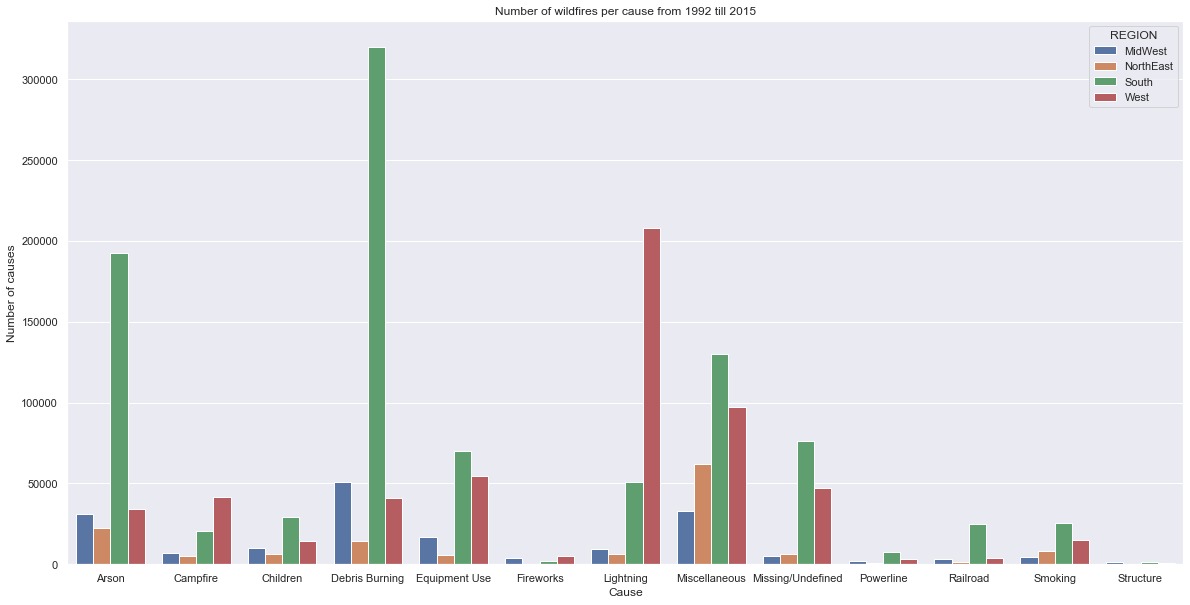

In [215]:
df = dfReg
grouped = df.groupby(['REGION','STAT_CAUSE_DESCR'],as_index=False)['STATE'].count()
df = grouped.rename(columns={'STATE':'COUNT'})
ax = sns.barplot(x='STAT_CAUSE_DESCR',y='COUNT', hue='REGION', data=df)
ax.set(xlabel='Cause',ylabel='Number of causes',title='Number of wildfires per cause from 1992 till 2015')
# plt.savefig('./figs/barplotCauses')

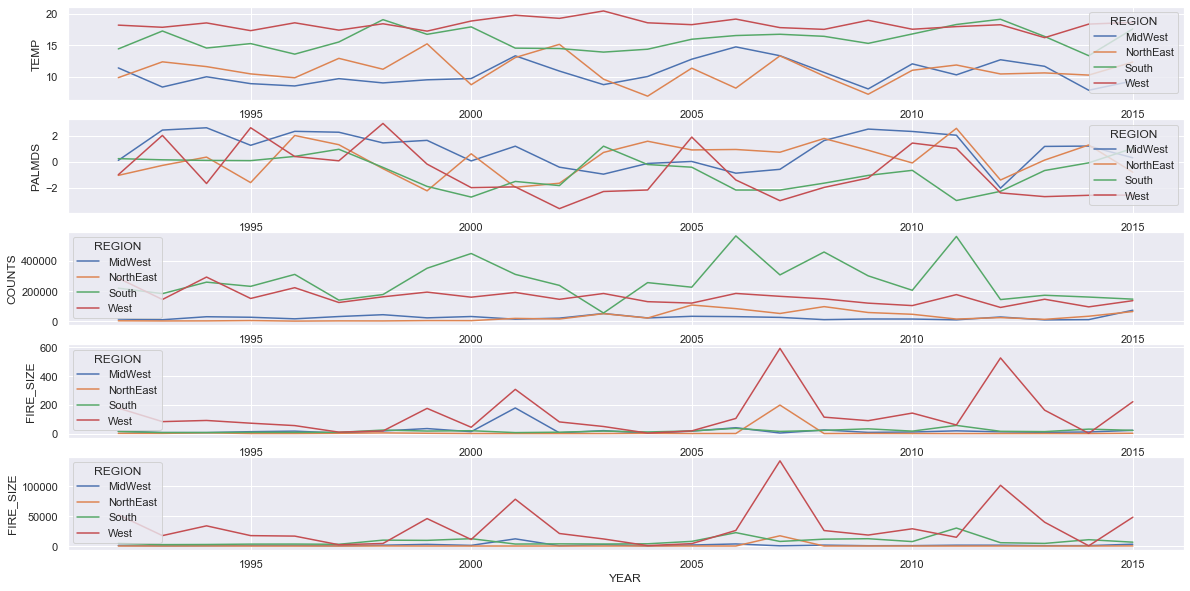

In [194]:
sample = dfReg.sample(frac=0.01)
# dfPlot = sample[sample.YEAR>2010]
# Take year average to smooth the time series for each group
dfPlot1 = pd.DataFrame(sample.groupby(['REGION','YEAR'],as_index=False)['TEMP','PALMDS','COUNTS','FIRE_SIZE']\
                      .agg({'TEMP':'mean','PALMDS':'mean','COUNTS':'sum','FIRE_SIZE':'mean'}))
dfPlot2 = pd.DataFrame(sample.groupby(['REGION','YEAR'],as_index=False)['FIRE_SIZE']\
                      .agg({'FIRE_SIZE':'sum'}))

sns.set(rc={'figure.figsize':(20,10)})
plt.subplot(5, 1, 1)
sns.lineplot(data=dfPlot1,hue='REGION',x='YEAR',y='TEMP')
plt.subplot(5, 1, 2)
sns.lineplot(data=dfPlot1,hue='REGION',x='YEAR',y='PALMDS')
plt.subplot(5, 1, 3)
sns.lineplot(data=dfPlot1,hue='REGION',x='YEAR',y='COUNTS')
plt.subplot(5, 1, 4)
sns.lineplot(data=dfPlot1,hue='REGION',x='YEAR',y='FIRE_SIZE')
plt.subplot(5, 1, 5)
sns.lineplot(data=dfPlot2,hue='REGION',x='YEAR',y='FIRE_SIZE')
plt.show()

# Use pairplot to check which of the variables correlates the most with counts (number of wildfires)

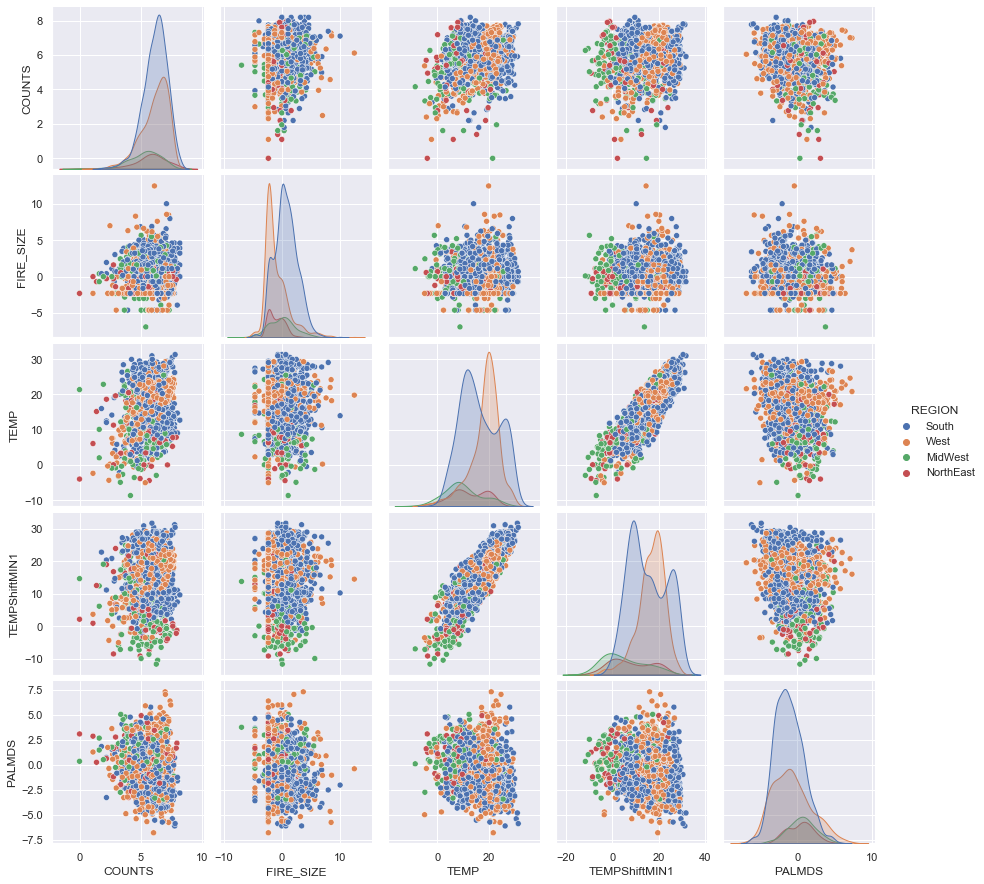

In [216]:
# seed(10)
samplePairPlot = dfReg[['STATE','REGION','COUNTS','FIRE_SIZE','TEMP','TEMPShiftMIN1','PALMDS']].sample(frac=0.001)
samplePairPlot['FIRE_SIZE'] = np.log(samplePairPlot['FIRE_SIZE'])
# samplePairPlot = samplePairPlot[samplePairPlot.STATE=='UT'].drop(columns=['STATE'])
samplePairPlot['COUNTS'] = np.log(samplePairPlot['COUNTS'])
sns.pairplot(samplePairPlot,hue='REGION')
# plt.savefig('./figs/pairPlot')

# Linear regression 

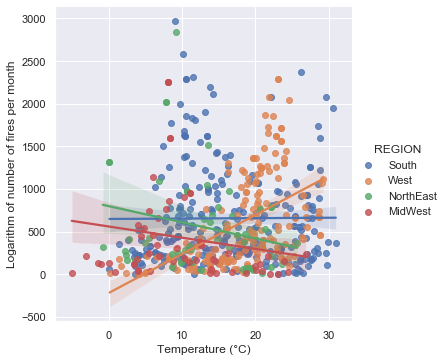

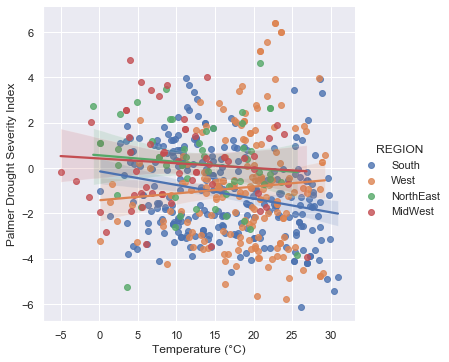

In [110]:
from random import seed
random.seed(10)
sampleRegPlot = dfReg[['STATE','REGION','COUNTS','FIRE_SIZE','TEMP','TEMPShiftMIN1','PALMDS']].sample(frac=0.0003)

sns.set(rc={'figure.figsize':(10,10)})
ax = sns.lmplot(x='TEMP',y='COUNTS',hue='REGION', data=sampleRegPlot)
ax.set(xlabel='Temperature (\N{DEGREE SIGN}C)', ylabel='Logarithm of number of fires per month')
# plt.savefig('./figs/regTempCount')
ax = sns.lmplot(x='TEMP',y='PALMDS',hue='REGION', data=sampleRegPlot)
ax.set(xlabel='Temperature (\N{DEGREE SIGN}C)', ylabel='Palmer Drought Severity Index')
# plt.savefig('./figs/regPalmDSCount')

In [176]:
from scipy.stats import pearsonr
df = dfReg
corr = np.zeros(len(regions))
print('Correlation between monthly average temperature and the monthly number of wildfires:')

for i in range(len(regions)):
    corr[i] = pearsonr(df[df.REGION==regions[i]].TEMP, df[df.REGION==regions[i]].COUNTS)[0]
    print(f'{regions[i]}: {corr[i]}')


Correlation between monthly average temperature and the monthly number of wildfires:
West: 0.4832975469637777
MidWest: -0.14107725430591148
South: -0.017400541093353976
NorthEast: -0.0841779551848715


In [67]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

def reg(df,XColName,YColName,intercept=True, logY=True, printResults=True):
    
    # Print states and causes included in the regression
    if printResults:
        print('States included in regression:\n')
        for state in np.sort(df.STATE.unique()):
            print(state,end='  ')
        print('\n\n')
        print('Causes included in regression:\n')
        for cause in np.sort(df['STAT_CAUSE_DESCR'].unique()):
            print(cause, end='  ')
        
    Y = df[YColName]
    
    # Transform Y if Y is log linear
    if logY:
        Y = np.log(Y)
    
    # Scatter plot of X and Y if X is 1D 
    if len(XColName) == 1:
        X = df[XColName[0]]
        if printResults==True:
            plt.scatter(X ,Y)
            plt.show()
        
    # Scatter plot of X and Y if X is 2D   
    elif len(XColName) == 2:
        X = df[[XColName[0], XColName[1]]]
        
        if printResults:
            fig = plt.figure(figsize=(9,4))
            
        def makeplot(position,angle):
            ax = fig.add_subplot(position,projection='3d')
            ax.scatter(x, y, z)
            ax.view_init(30, angle)
            ax.set_xlabel(f'{XColName[0]}')
            ax.set_ylabel(f'{XColName[1]}')
            ax.set_zlabel(f'{YColName}')
            return ax
        
        x = df[XColName[0]]
        y = df[XColName[1]]
        z = Y
        
        if printResults:
            ax1 = makeplot(121,180)
            ax2 = makeplot(122,290)
            plt.show() 
    else:
        X = df[XColName]
        
    # Include intercept if intercept is true      
    if intercept:
        X = sm.add_constant(X)
        XColName = ['Intercept'] + XColName
    
    lm = sm.OLS(endog=Y,exog=X).fit()
    
    if printResults:
        print(lm.summary(xname=XColName))
        print()
    return lm


# Linear regression of number of wildfires on average monthly temperature and 2 month average Palmer Drought Severity Index

In [68]:
display(dfWild['STAT_CAUSE_DESCR'].unique())

array(['Smoking', 'Miscellaneous', 'Debris Burning', 'Structure',
       'Campfire', 'Arson', 'Children', 'Fireworks', 'Powerline',
       'Missing/Undefined', 'Equipment Use', 'Lightning', 'Railroad'],
      dtype=object)

In [69]:
display(dfReg.columns)

Index(['DATE_DISCOVERY', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'STATE', 'LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'COUNTS', 'DATE',
       'TEMP', '2MavgTEMP', '3MavgTEMP', '4MavgTEMP', '5MavgTEMP', '6MavgTEMP',
       '7MavgTEMP', '8MavgTEMP', '9MavgTEMP', '10MavgTEMP', '11MavgTEMP',
       '12MavgTEMP', 'TEMPShiftMIN1', 'TEMPShiftMIN2', 'TEMPShiftMIN3',
       'TEMPShiftMIN4', 'PALMZ', '2MavgPALMZ', '3MavgPALMZ', '4MavgPALMZ',
       '5MavgPALMZ', '6MavgPALMZ', '7MavgPALMZ', '8MavgPALMZ', '9MavgPALMZ',
       '10MavgPALMZ', '11MavgPALMZ', '12MavgPALMZ', 'PALMDS', '2MavgPALMDS',
       '3MavgPALMDS', '4MavgPALMDS', '5MavgPALMDS', '6MavgPALMDS',
       '7MavgPALMDS', '8MavgPALMDS', '9MavgPALMDS', '10MavgPALMDS',
       '11MavgPALMDS', '12MavgPALMDS', 'PALMDH', '2MavgPALMDH', '3MavgPALMDH',
       '4MavgPALMDH', '5MavgPALMDH', '6MavgPALMDH', '7MavgPALMDH',
       '8MavgPALMDH', '9MavgPALMDH', '10MavgPALMDH', '11MavgPALMDH',
       '12MavgPALMDH', 'REGION'],
      dt

States included in regression:

AZ  CA  CO  ID  MT  NM  NV  OR  UT  WA  WY  


Causes included in regression:

Arson  Campfire  Children  Debris Burning  Equipment Use  Fireworks  Lightning  Miscellaneous  Missing/Undefined  Powerline  Railroad  Smoking  Structure  

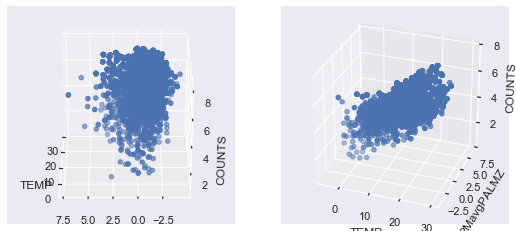

                            OLS Regression Results                            
Dep. Variable:                 COUNTS   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     1836.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:11:32   Log-Likelihood:                -7010.7
No. Observations:                5718   AIC:                         1.403e+04
Df Residuals:                    5715   BIC:                         1.405e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9272      0.037    104.869      0.0

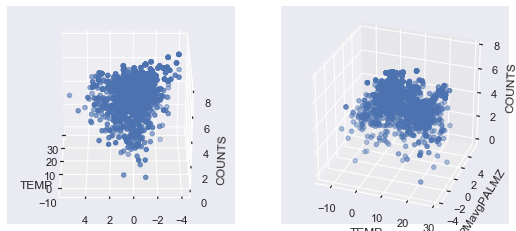

                            OLS Regression Results                            
Dep. Variable:                 COUNTS   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     34.38
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.26e-15
Time:                        22:11:33   Log-Likelihood:                -2931.0
No. Observations:                1757   AIC:                             5868.
Df Residuals:                    1754   BIC:                             5884.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3702      0.054     99.846      0.0

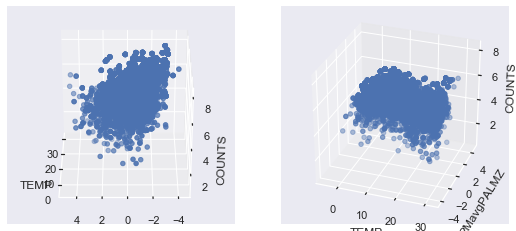

                            OLS Regression Results                            
Dep. Variable:                 COUNTS   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     824.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:11:34   Log-Likelihood:                -12453.
No. Observations:                9449   AIC:                         2.491e+04
Df Residuals:                    9446   BIC:                         2.493e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1314      0.022    275.280      0.0

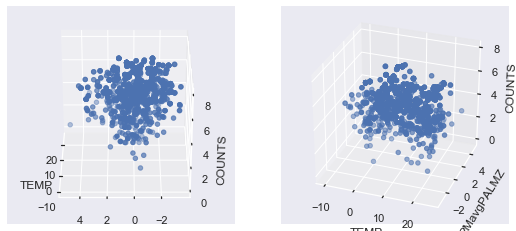

                            OLS Regression Results                            
Dep. Variable:                 COUNTS   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.26
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.40e-05
Time:                        22:11:34   Log-Likelihood:                -2430.3
No. Observations:                1432   AIC:                             4867.
Df Residuals:                    1429   BIC:                             4882.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6961      0.064     88.719      0.0

In [151]:
import random
random.seed(10)
dfreg = dfReg.sample(frac=0.01)
if False:
#     dfreg = dfreg[(dfreg['STAT_CAUSE_DESCR'] == 'Miscellaneous') |\
#                   (dfreg['STAT_CAUSE_DESCR'] == 'Lightning') |\
#                   (dfreg['STAT_CAUSE_DESCR'] == 'Missing/Undefined')]
    dfreg = dfreg[dfreg['STATE'] == 'UT'] #|\
#     (dfreg['STATE'] == 'CA')]
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'A']
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'B']


XColName = ['TEMP', '2MavgPALMZ']
YColName = 'COUNTS'
linearModels = []

for region in regions:
    lm1 = reg(dfreg[dfreg.REGION==region],XColName,YColName,intercept=True,printResults=True,logY=True)
    linearModels.append(lm1)
    
# XColName = ['TEMP', '2MavgPALMZ']
# YColName = 'COUNTS'
# lm2 = reg(dfreg,XColName,YColName,intercept=True,printResults=True,logY=True)

# XColName = ['TEMP', 'TEMPShiftMIN1', '2MavgPALMZ','2MavgPALMDS']
# YColName = 'COUNTS'
# lm1 = reg(dfreg,XColName,YColName,intercept=True,printResults=True,logY=True)

## Save model to latex table using stargazer package and save as textfile so the text could be easily copied from the textfile in overleaf

In [173]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargaz = Stargazer(linearModels)
stargaz.custom_columns(['West', 'MidWest', 'South', 'NorthEast'],[1,1,1,1])
# stargaz.dependent_variable_name('log(Number of Wildfires)')
latexTable = stargaz.render_latex()
HTML(stargaz.render_html())

In [ ]:
XColName = ['2MavgTEMP']
YColName = 'COUNTS'
# dftest = dfreg[dfreg.FIRE_SIZE > 20]
dftest = dfreg
reg(dftest ,XColName, YColName, logY=True)

# Save correlation between average monthly temperature and logarithm of average monthly number of wildfires for each state.

In [218]:
states = dfReg.STATE.unique()
pearsonRdict = dict(zip(states.T,np.zeros(len(states)).T))
dfRegSample = dfReg

for i in states:
    if dfreg.shape[0] == 0:
        break  
    r = pearsonr(dfRegSample[dfRegSample.STATE==i].TEMP,dfRegSample[dfRegSample.STATE==i].COUNTS)[0]
    pearsonRdict[i] = r
    

# Pearsons R for each state, the results show that the average monthly temperature and the Palmer DroughtSeverity-Index explain the number of wildfires better for states which are located in the West.

In [219]:
dfStatesR2 = pd.DataFrame(pearsonRdict.items(), columns=['STATE', 'PearsonsR'])
import plotly.express as px 

fig = px.choropleth(dfStatesR2,  
                    locations="STATE",  
                    color="PearsonsR",  
                    hover_name="STATE", 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Correlation temperature and number wildfires', 
    geo_scope='usa',
)
fig.show()

# Average monthly state fraction of total wildfires

In [226]:
# wildCountPlot = dfWild[(dfWild.DATE_DISCOVERY > "2015") & (dfWild.DATE_DISCOVERY<"2020")]\
#                 .groupby(['STATE'])['FIRE_SIZE'].count()
wildCountPlot = dfWild.groupby(['STATE'])['FIRE_SIZE'].count()
wildCountPlot = pd.DataFrame(wildCountPlot)
wildCountPlot = wildCountPlot.rename(columns={'FIRE_SIZE':'COUNTS'})
wildFrac = (wildCountPlot/wildCountPlot.sum()).sort_values(by='COUNTS')
wildFrac = wildFrac.reset_index()

fig = px.choropleth(wildFrac,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="COUNTS",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average monthly state fraction of total wildfires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

In [225]:
wildCountPlot = dfWild.groupby(['STATE'])['FIRE_SIZE'].mean()
wildCountPlot = pd.DataFrame(wildCountPlot).reset_index()
wildCountPlot = wildCountPlot[wildCountPlot.STATE != 'AK']

fig = px.choropleth(wildCountPlot,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="FIRE_SIZE",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average size of monthly wildfires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

## The average palmerDS-Index high (wet) and low (dry). This shows that the states with the high R2 are also states which are relatively dry.

In [228]:
# wildCountPlot = dfReg[dfReg.YEAR==2015].groupby(['STATE'])['PALMDS'].mean()
wildCountPlot = dfReg.groupby(['STATE'])['PALMDS'].mean()
wildCountPlot = pd.DataFrame(wildCountPlot).reset_index()
wildCountPlot = wildCountPlot[wildCountPlot.STATE != 'AK']
fig = px.choropleth(wildCountPlot,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="PALMDS", # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Palmer Drought Severity Index', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

In [230]:
# wildCountPlot = dfReg[dfReg.YEAR==2015].groupby(['STATE'])['PALMDS'].mean()
wildCountPlot = dfReg.groupby(['STATE'])['TEMP'].mean()
wildCountPlot = pd.DataFrame(wildCountPlot).reset_index()
wildCountPlot = wildCountPlot[wildCountPlot.STATE != 'AK']
fig = px.choropleth(wildCountPlot,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="TEMP", # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average monthly temperature', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

# Create tables for number of wildfires per month/year and per state

In [188]:
# Table for fraction of wildfires for each state per month
CountMonthly = pd.pivot_table(wildCount, values='COUNTS', index=['YEAR','MONTH'],
                       columns=['STATE'], aggfunc=np.sum,fill_value=0)
fracCountMonthly = CountMonthly.div(CountMonthly.sum(axis=1), axis=0)
# display(fracCountMonthly)

# Table for fraction of wildfires for each state per year
countYearly = pd.pivot_table(wildCount, values='COUNTS', index=['YEAR'],
                       columns=['STATE'], aggfunc=np.sum,fill_value=0)
fracCountYearly = countYearly.div(countYearly.sum(axis=1), axis=0)
# display(fracCountYearly)

# Table for mean size of a wildfire for each state per year
meanSize = pd.pivot_table(dfWild, values='FIRE_SIZE', index=['YEAR'],\
                          aggfunc=np.mean, fill_value=0)

# Table for mean temperature for each state for each month
tempTable = pd.pivot_table(dftemp, values='TEMP', index=['YEAR'],
                           columns=['STATE'], aggfunc=np.mean,fill_value=0)



# fracCountYearly[clusterStateStrings].plot()
# fracCountYearly.plot()